<a href="https://colab.research.google.com/github/sarahethompson/eportfolio/blob/main/artefacts/module-3/unit-7-multi-layer-perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Dr Mike Lakoju

    * If X is high, the value is approximately 1
    * if X is small, the value is approximately 0

## Import Libraries

In [1]:
import numpy as np

## Define the Sigmoid Function

In [2]:
def sigmoid(sum_func):
  return 1 / (1 + np.exp(-sum_func))

**The sigmoid function is a common activation function used in neural networks. It squashes the input value sum_func into a range between 0 and 1. The formula used is $1 / (1 + e^{-sum\_func})$$1 / (1 + e^{-sum\_func})$, where 'e' is Euler's number (the base of the natural logarithm). This function helps introduce non-linearity into the neural network, allowing it to learn complex patter**

In [3]:
sigmoid(0)

np.float64(0.5)

In [4]:
np.exp(2)

np.float64(7.38905609893065)

In [5]:
np.exp(1)

np.float64(2.718281828459045)

In [8]:
sigmoid(400)

np.float64(1.0)

In [7]:
sigmoid(-20.5)

np.float64(1.2501528648238605e-09)

# Input Layer to Hidden Layer

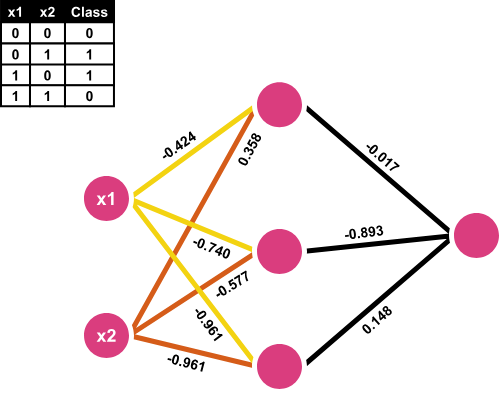

### Define "Inputs, outputs and weights" as Numpy arrays

#### Inputs

In [9]:
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

In [10]:
inputs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [11]:
inputs.shape

(4, 2)

#### Outputs

In [12]:
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

In [ ]:
outputs.shape

(4, 1)

### Weights

#### These weights are for the connection between the inputs and the hidden layer

In [13]:
# First row holds the weights for x1, 2nd row contains the weights for x2

weights_0 = np.array([[-0.424, -0.740, -0.961],
                     [0.358, -0.577, -0.469]])
weights_0.shape

(2, 3)

#### These weights are for the connection between the  hidden layer and the output

In [14]:
weights_1 = np.array([[-0.017],
                     [-0.893],
                     [0.148]])
weights_1.shape

(3, 1)

#### Epochs & Learning Rate

In [15]:
epochs = 100
learning_rate = 0.3

In [16]:
#for epoch in epochs:

Dealing with the first side

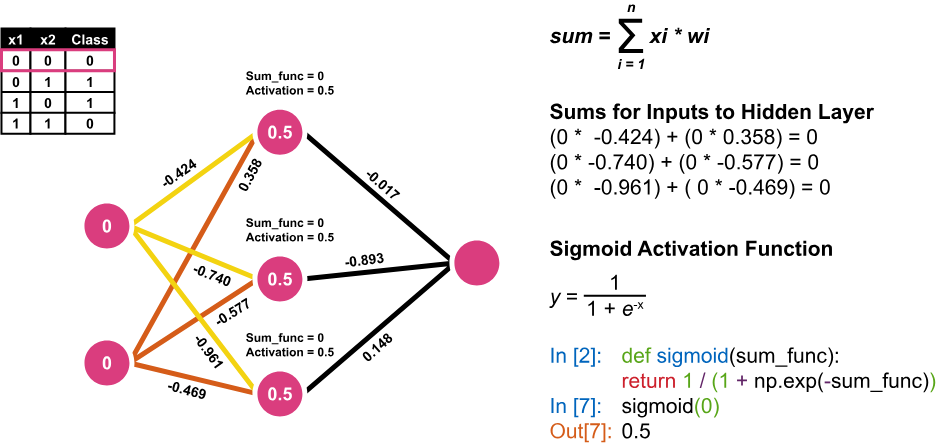

In [17]:
input_layer = inputs
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [18]:
# "sum_synapse_0" This holds the sum function total of weights for the hidden layer
# For the Output: Each row holds the sum_func for each input data  [0,0,0 -> data 0,0],[0.358, -0.577, -0.469 --> 0,1]
# The dot product does the matrix multiplication and also the sum

sum_synapse_0 = np.dot(input_layer, weights_0)
sum_synapse_0

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

In [19]:
# Computing the Sigmoid function for the Hidden layer

hidden_layer = sigmoid(sum_synapse_0)
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

Dealing with the 2nd side


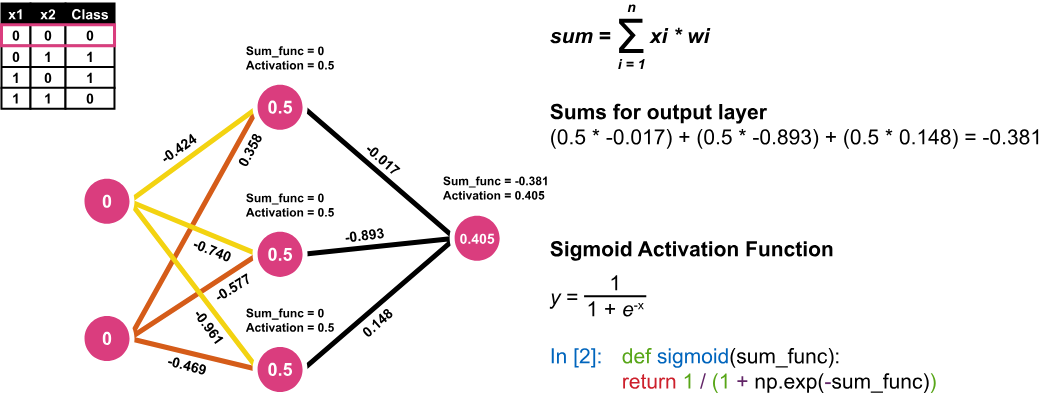

In [20]:
weights_1

array([[-0.017],
       [-0.893],
       [ 0.148]])

In [21]:
# "sum_synapse_1" This holds the sum function total of weights for the output layer
# For the Output: Each row holds the sum_func for each input data

sum_synapse_1 = np.dot(hidden_layer, weights_1)
sum_synapse_1

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

In [22]:
output_layer = sigmoid(sum_synapse_1)
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [23]:
outputs

array([[0],
       [1],
       [1],
       [0]])

In [24]:
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [25]:
error_output_layer = outputs - output_layer
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [26]:
average_error = np.mean(abs(error_output_layer))
average_error

np.float64(0.49880848923713045)

Sigmoid Derivative


In [27]:
def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

# Delta output Calculation

In [28]:
# output_layer holds the results of our application of the sigmoid, computed above

output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [29]:
# derivative_output is our Derivative of the activation function (sigmoid) which we have on the slide
# each row is for each instance of our input dataset

derivative_output = sigmoid_derivative(output_layer)
derivative_output

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

In [30]:
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [31]:
# Delta output
# each row is for each instance of our input dataset

delta_output = error_output_layer * derivative_output
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

# Delta calculations for the Hidden Layer

In [32]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [33]:
weights_1

array([[-0.017],
       [-0.893],
       [ 0.148]])

#### NOTE THAT:
    * Lets deal with this part first (Weight  * delta_output)
    * Notice that we will get an error below becuase of the shape of the weights_1  (Transpose)

In [35]:
delta_output_x_weight = delta_output.dot(weights_1.T)

In [ ]:
weights_1.shape

(3, 1)

In [36]:
weights_1T = weights_1.T
weights_1T

array([[-0.017, -0.893,  0.148]])

In [37]:
weights_1T.shape

(1, 3)

#### Each one of the weights will have to be multiplied by each delta_output for each data instance     
       
       array([[-0.017],
             [-0.893],
             [ 0.148]])

In [38]:
delta_output_x_weight = delta_output.dot(weights_1T)
delta_output_x_weight

array([[ 0.0016639 ,  0.08740354, -0.01448569],
       [-0.0023697 , -0.12447882,  0.02063031],
       [-0.0023554 , -0.12372783,  0.02050584],
       [ 0.00193282,  0.10153015, -0.01682694]])

#### NOTE THAT:
    * Now we need to deal with the last part of the equation   
    * sigmoid_derivative * delta_output_x_weight

In [39]:
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [40]:
#  Each row in the output of delta_hidden_layer is for the data input values

delta_hidden_layer = delta_output_x_weight * sigmoid_derivative(hidden_layer)
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

#### We will deal with the (input * delta) first
* The first column in "hidden_layer" holds  the activation value for the first neuron

In [41]:
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [42]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

* We need to multiply the "inputs" by "delta" however, for the matrix multiplication we need to transpose the values in the hidden_layer, so we have all of them on one row for each neuron

In [43]:
hidden_layerT = hidden_layer.T
hidden_layerT

array([[0.5       , 0.5885562 , 0.39555998, 0.48350599],
       [0.5       , 0.35962319, 0.32300414, 0.21131785],
       [0.5       , 0.38485296, 0.27667802, 0.19309868]])

In [44]:
input_x_delta1 = hidden_layerT.dot(delta_output)
input_x_delta1

array([[0.03293657],
       [0.02191844],
       [0.02108814]])

#### Let us now update the "weights_1"

In [45]:
weights_1 = weights_1 + (input_x_delta1 * learning_rate)
weights_1

array([[-0.00711903],
       [-0.88642447],
       [ 0.15432644]])

## Dealing with the Hidden Layer to Input Layer


In [46]:
# First column is X1, and 2nd column is X2 (our input values )

input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [47]:
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [48]:
# we need to transpose the values just as we did before

input_layerT = input_layer.T
input_layerT

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [49]:
input_x_delta0 = input_layerT.dot(delta_hidden_layer)
input_x_delta0

array([[-8.04778516e-05, -1.01345901e-02,  1.48194623e-03],
       [-9.11603819e-05, -1.17454886e-02,  2.26221011e-03]])

In [50]:
weights_0 = weights_0 + (input_x_delta0 * learning_rate)
weights_0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

### So all the lines of code above, has allowed us to complete our first epoch. we will need to put all the code together so we can run multiple epochs

# Complete Artificial Neural Network

In [51]:
#Importing Numpy
import numpy as np

# This is the sigmoid Function
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

#This is the sigmoid derivative as used before
def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

# Our input values
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
#Our output values
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

In [52]:
# weights_0 = np.array([[-0.424, -0.740, -0.961],
#                     [0.358, -0.577, -0.469]])

# weights_1 = np.array([[-0.017],
#                     [-0.893],
#                     [0.148]])

### Initializing our weights with random values
* <b>Note:</b> Multiplying the random number by 2 and subtracting by 1, allows us to have a mix of both positive and negative random numbers for the weights

In [53]:
weights_0 = 2 * np.random.random((2, 3)) - 1
weights_1 = 2 * np.random.random((3, 1)) - 1

In [55]:
epochs = 400000
learning_rate = 0.6
error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights_0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights_1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
  if epoch % 100000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)

  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output

  weights1T = weights_1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)

  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights_1 = weights_1 + (input_x_delta1 * learning_rate)

  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.5010547071450848
Epoch: 100001 Error: 0.007602289562301078
Epoch: 200001 Error: 0.00532218105032497
Epoch: 300001 Error: 0.004325519273883595


#### At this point after runing for 1million epochs you can see the value is very low.

In [56]:
#1 million epochs with a learning rate of 0.3
1 - 0.009670967930930745

0.9903290320690693

In [57]:
#after 400,000 epochs, with a learning rate of 0.6
1- 0.008192022809586367

0.9918079771904136

# Let's visualize this result

In [58]:
import matplotlib.pyplot as plt


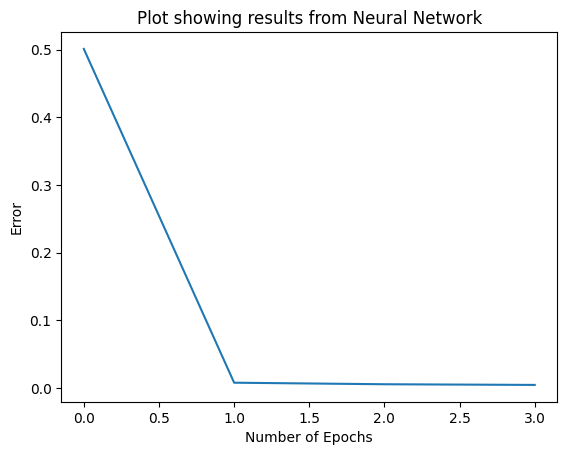

In [59]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

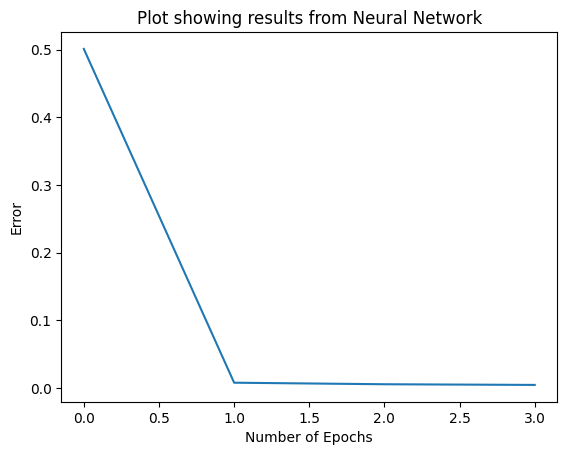

In [60]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

#### Compearing the outputs and the predictions

In [61]:
outputs

array([[0],
       [1],
       [1],
       [0]])

In [62]:
output_layer

array([[6.42705450e-03],
       [9.96149348e-01],
       [9.96149670e-01],
       [8.13237575e-04]])

#### * We see that our neural network was able to get values close to the actual values from the results.
#### * This shows that our neural network can handle the complexity of the XOR operator dataset.

* Let us see the updated weights. These are the weights we will require if we want to make future predictions

In [63]:
weights_0

array([[ 7.15771633,  6.10406913, -4.86664723],
       [-4.87944254,  6.17288987,  7.12050378]])

In [64]:
weights_1

array([[-15.78832917],
       [ 21.50037008],
       [-15.79362571]])

In [65]:
# This function accepts an instance of a dataset

def calculate_output(instance):
    #input to hidden layer
    hidden_layer = sigmoid(np.dot(instance, weights_0))
    #hidden to output layer
    output_layer = sigmoid(np.dot(hidden_layer, weights_1))
    return output_layer[0]

In [66]:
round(calculate_output(np.array([0, 0])))

0

In [67]:
round(calculate_output(np.array([0, 1])))

1

In [68]:
round(calculate_output(np.array([1, 0])))

1

In [69]:
round(calculate_output(np.array([1, 1])))

0

## High-Level Overview

This notebook demonstrates the fundamental concepts and implementation of a simple **artificial neural network** trained to solve the **XOR (exclusive OR) problem**.

Here's a breakdown of the key stages:

1.  **Introduction to Core Components:**
    *   The notebook starts by introducing essential components like the **sigmoid activation function** and its derivative, explaining their purpose in introducing non-linearity and enabling gradient-based learning.

2.  **Defining Inputs, Outputs, and Initial Weights:**
    *   It sets up the input data (`inputs`) and the desired output data (`outputs`) for the XOR problem.
    *   It defines the structure of the neural network with an input layer, a hidden layer, and an output layer.
    *   Initial weights (`weights_0` and `weights_1`) are introduced, first with specific values for illustration and then with random values as is standard practice.

3.  **Forward Propagation (Making Predictions):**
    *   The notebook walks through the process of **forward propagation**, where input data is passed through the network layers.
    *   It shows how the weighted sum of inputs is calculated at each layer (`sum_synapse0`, `sum_synapse1`) and how the activation function (sigmoid) is applied (`hidden_layer`, `output_layer`).

4.  **Calculating Error:**
    *   It calculates the difference between the network's predicted output and the actual desired output (`error_output_layer`).
    *   It also calculates the average error to get a sense of the network's performance.

5.  **Backward Propagation (Learning):**
    *   The notebook then demonstrates the **backward propagation** process, which is how the network learns from its errors.
    *   It calculates the "delta" (error signal) for the output layer (`delta_output`) and the hidden layer (`delta_hidden_layer`) using the error and the derivative of the activation function.

6.  **Updating Weights:**
    *   Using the calculated deltas and a **learning rate**, the notebook shows how the weights (`weights_0` and `weights_1`) are adjusted to reduce the error. This is the core of the learning process.

7.  **Training Loop:**
    *   All the steps from forward propagation to weight updates are combined into a **training loop** that runs for a specified number of epochs.
    *   During each epoch, the network processes the input data, calculates the error, and updates the weights to minimize that error.
    *   The error is tracked and printed periodically to monitor the training progress.

8.  **Evaluation and Prediction:**
    *   After training, the notebook visualizes the error reduction over time using a plot.
    *   It compares the network's final outputs with the expected outputs for the training data.
    *   Finally, it demonstrates how to use the trained network (with the learned weights) to make predictions on new input instances.

In essence, this notebook provides a step-by-step guide to building and training a simple feedforward neural network using NumPy to solve a classic non-linear problem.